In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

data_path = "./data/"
house = pd.read_csv(data_path + "houseprice.csv")

In [2]:
house.head(5)

,price,tax,ground,floor,year
0,12.95,98.352,34.72,19.96,4.2
1,14.75,100.416,35.31,30.00,6.2
2,13.95,90.858,22.75,23.50,4.0
3,12.95,91.146,40.50,24.64,5.4
4,14.95,101.194,44.55,22.42,4.2



#### houseprice.csv는 주택판매가격(price)과 이에 영향을 줄 것으로 판단되는 4가지 설명변수인 세금(tax; 만원), 대지평수(ground; 평), 건물평수(floor; 평), 주택연령(year; 년)을 27개 주택에 대해 조사한 것이다. 

#### 1. 5개 변수들에 대한 산점도 행렬을 작성하고 변수들 간의 관계를 설명하여라. 

In [3]:
# 회귀분석 모델을 돌리기 전에 꼭 상관관계를 먼저 확인하기

house.corr()

,price,tax,ground,floor,year
price,1.000000,0.915249,0.726335,0.928827,-0.310290
tax,0.915249,1.000000,0.686850,0.832415,-0.371172
ground,0.726335,0.686850,1.000000,0.703269,-0.380275
floor,0.928827,0.832415,0.703269,1.000000,-0.178057
year,-0.310290,-0.371172,-0.380275,-0.178057,1.000000


C:\Users\SAMSUNG\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


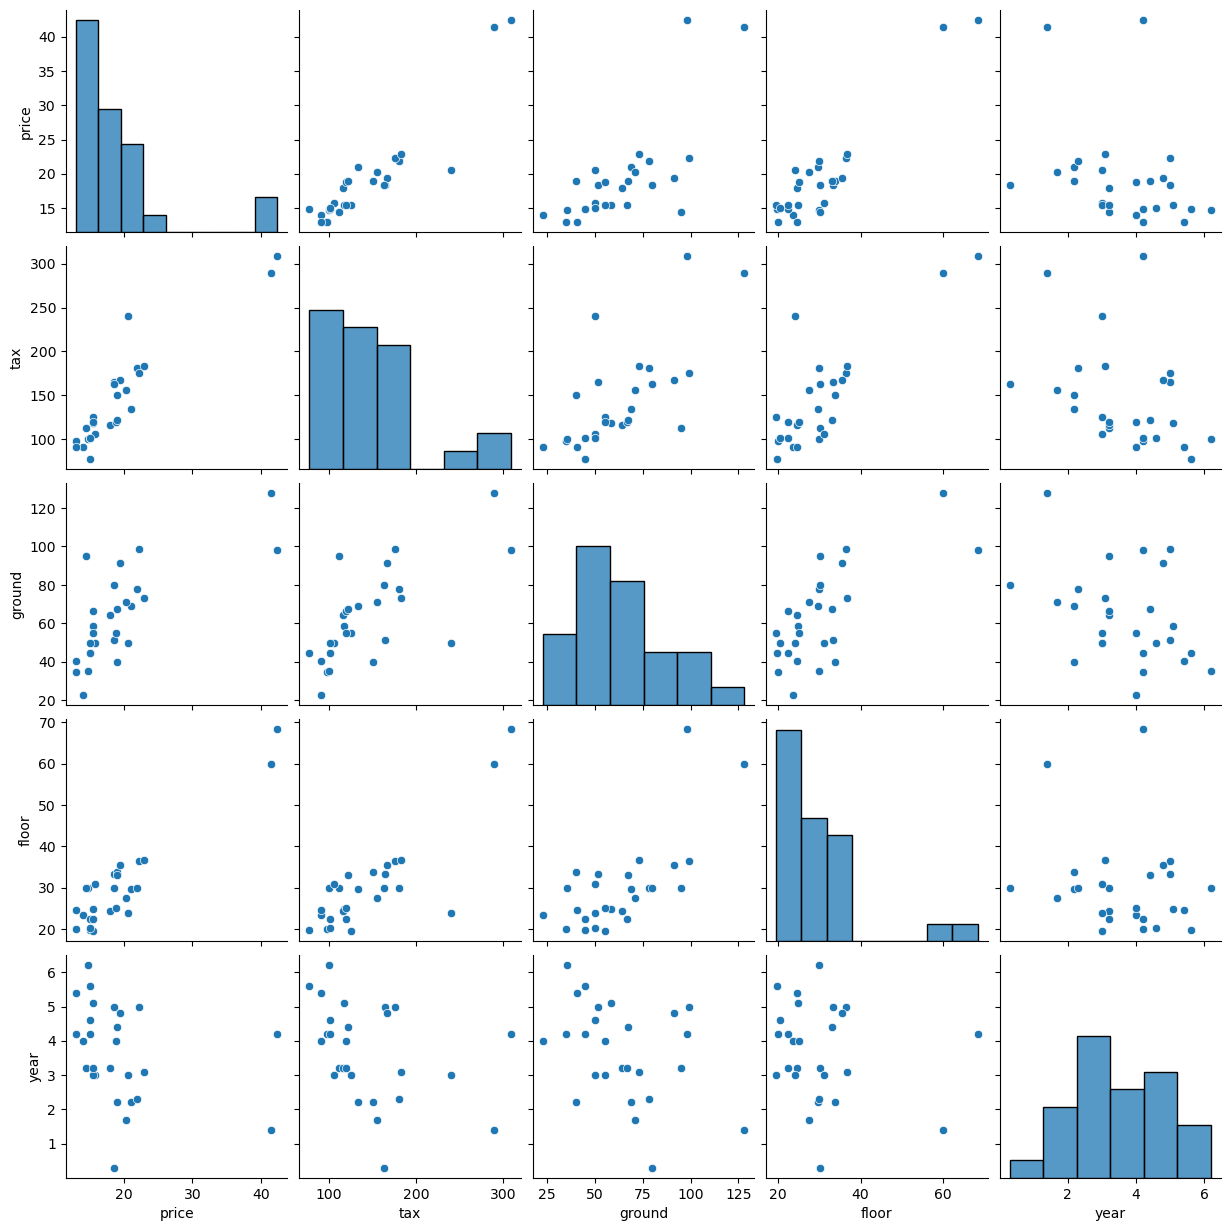

In [4]:
sns.pairplot(house)


#### 2. 주택 판매가격을 종속변수로, 나머지 4개 변수를 설명변수로 하는 선형회귀모형을 적합하여라. 

In [5]:
model1 = smf.ols('price~tax+  ground + floor + year', data = house).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Fri, 15 Sep 2023   Prob (F-statistic):           1.82e-12
Time:                        17:11:25   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2187      2.047      0.595      0.558      -3.026       5.463
tax            0.0519      0.014      3.756      0.001       0.023       0.081
ground         0.0116      0.025      0.458      0.652      -0.041       0.064
floor          0.3494      0.073      4.807      0.000       0.199       0.500
year          -0.2189      0.331     -0.660      0.516      -0.906       0.469
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         903.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3. 회귀모형이 유의한가? 

In [6]:
# F-test
# H0 : beta1 ==..beta4 = 0
# 74.53 : 검정통계량
# 1.82e-12 : p_value < 0.05 => H0를 기각, 통계적으로 유의하다

#### 4. 주택 판매가격에 유의한 영향을 주는 변수들은 무엇인가?

In [7]:
# H0 : beta1 = 0
# 3.756 : 검정 통계량
# 0.001 : p_value < 0.05 
# ==> H0를 기각, tax는 price와 유의한 상관관계가 있다(다른 설명변수가 고정되어 있을 때)

# beta2, beta4에 대한 귀무가설은 채택, ground와 year는 price와 유의한 상관관계가 없다(다른 설명변수가 고정되어 있을 때)
# beta1, beta3에 대한 귀무가설은 기각


#### 5.	적합된 회귀식은 종속변수의 변동량의 몇 %를 설명하는가?

In [8]:
# r-squared = 0.931
# 93.1%를 설명

In [7]:
model1.resid

0     0.164737
1    -1.219487
2     0.412151
3    -0.900424
4     1.043582
5     3.493788
6    -0.123694
7    -3.489145
8     1.093663
9     3.065654
10    2.069837
11   -1.742842
12    0.968897
13    0.133710
14    1.833845
15   -2.467361
16    2.056301
17    0.876718
18    0.457414
19    2.766962
20   -1.897083
21   -0.877191
22    0.039608
23   -2.883350
24   -2.598174
25   -0.782791
26   -1.495324
dtype: float64

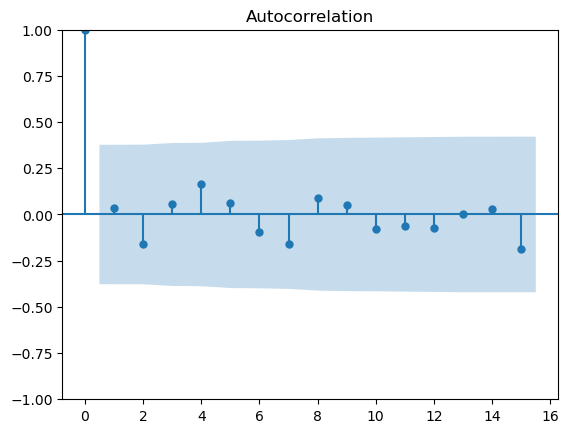

In [9]:
# 오차항의 자기상관
## plot_acf : autocorrealation funcion 시각화
## x축은 lag, y축은 자기상관
## lag=0이면 자기상관은 1(자기자신의 상관관계라서), 범위 안에 들어와있으면 자기상관 = 0으로 간주한다.
## 시점이 멀어질수록(과거로 갈수록)  correlation이 작아진다.

sm.graphics.tsa.plot_acf(model1.resid)
plt.show()

#### 6.  Influential point가 있는가? 이 관측치들은 어떤 특징을 가지고 있는가? 이들을 제외하면 회귀분석 결과에 영향을 줄 것으로 예상되는가? 

#### 7. 세금이 150만원, 대지평수가 50평, 건물평수가 30평, 주택연령이 3년인 주택의 평균판매가격에 대한 추정값과 90% 신뢰구간을 구하여라. 

#### 8. 설명변수들을 표준화하였을 때, 회귀식을 적합한 결과는 어떻게 달라지는가?

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
house_s = scaler.fit_transform(house.iloc[:,1:])
house_s = pd.DataFrame(house_s,columns = house.columns[1:])
house_s['price'] = house['price']

model2 = smf.ols('price~tax+  ground + floor + year', data = house_s).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     74.53
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.82e-12
Time:                        16:47:04   Log-Likelihood:                -54.781
No. Observations:                  27   AIC:                             119.6
Df Residuals:                      22   BIC:                             126.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.2500      0.392     49.061      0.000      18.436      20.064
tax            2.9384      0.782      3.756      0.001       1.316       4.561
ground         0.2735      0.598      0.458      0.652      -0.966       1.513
floor          3.8283      0.796      4.807      0.000       2.177       5.480
year          -0.3019      0.457     -0.660      0.516      -1.250       0.646
==============================================================================
Omnibus:                        0.837   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.737
Skew:                           0.014   Prob(JB):                        0.692
Kurtosis:                       2.191   Cond. No.                         4.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# 표준화 전 모델 요약
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.2187,2.047,0.595,0.558,-3.026,5.463
tax,0.0519,0.014,3.756,0.001,0.023,0.081
ground,0.0116,0.025,0.458,0.652,-0.041,0.064
floor,0.3494,0.073,4.807,0.000,0.199,0.500
year,-0.2189,0.331,-0.660,0.516,-0.906,0.469


In [20]:
# 표준화(평균0, 표준편차1) 후 모델 요약
model2.summary().tables[1]

# tax=2.9384 : tax가 1 표준편차 증가할 떄 price가 2.9384 증가
# year=-0.2189 : year가 1 표준편차 증가했을 때 price가 -0.2189
# 표준화 회귀계수라고도 부름
# 표준화를 하더라도 p값과 t값은 동일함 => 유의성에 영향을 주지는 않는다.

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,19.2500,0.392,49.061,0.000,18.436,20.064
tax,2.9384,0.782,3.756,0.001,1.316,4.561
ground,0.2735,0.598,0.458,0.652,-0.966,1.513
floor,3.8283,0.796,4.807,0.000,2.177,5.480
year,-0.3019,0.457,-0.660,0.516,-1.250,0.646


In [21]:
# 기존 평균 요약
house.describe()
# tax의 평균은 144로 큰 값, year의 평균은 3.6으로 작은 값
# tax가 1증가했다는 것은 굉장히 미미하게 증가했다는 의미 => 그럼에도 불구하고 통계적으로 의미있음
# year가 1증가했다는 것은 굉장히 크게 증가했다는 의미 => 변수 자체가 의미 없을 수도 있음

,price,tax,ground,floor,year
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,19.250000,144.898815,63.475556,30.241481,3.648148
std,7.153751,57.640439,24.036766,11.165303,1.405311
min,12.950000,77.820000,22.750000,19.500000,0.300000
25%,14.975000,103.600000,47.216500,23.750000,3.000000
50%,18.450000,121.862000,58.500000,29.760000,4.000000
75%,20.375000,166.071000,75.631000,33.160000,4.700000
max,42.450000,308.404000,128.000000,68.400000,6.200000


In [22]:
model1.summary().tables[0]

Dep. Variable:,price,R-squared:,0.931
Model:,OLS,Adj. R-squared:,0.919
Method:,Least Squares,F-statistic:,74.53
Date:,"Wed, 13 Sep 2023",Prob (F-statistic):,1.82e-12
Time:,16:57:35,Log-Likelihood:,-54.781
No. Observations:,27,AIC:,119.6
Df Residuals:,22,BIC:,126.0
Df Model:,4,,
Covariance Type:,nonrobust,,


In [23]:
model2.summary().tables[0]

# 표준화해도 R-Squared, F-statistic 결과는 동일함

Dep. Variable:,price,R-squared:,0.931
Model:,OLS,Adj. R-squared:,0.919
Method:,Least Squares,F-statistic:,74.53
Date:,"Wed, 13 Sep 2023",Prob (F-statistic):,1.82e-12
Time:,16:57:40,Log-Likelihood:,-54.781
No. Observations:,27,AIC:,119.6
Df Residuals:,22,BIC:,126.0
Df Model:,4,,
Covariance Type:,nonrobust,,
